# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import xgboost as xgb


import warnings

#эти две штуки взяты из гугл диска
from plot_cm import plot_confusion_matrix
from plot_roc import plot_roc

from matplotlib import style

from sklearn import linear_model, metrics, preprocessing
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor, KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize, PolynomialFeatures


minimax_scaler = preprocessing.MinMaxScaler()

%config InlineBackend.figure_format = 'svg' 

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

#### Исправление опечаток и пропусков

In [6]:
for val in data.columns.tolist():
    print(val, ':',  data[val].unique())

ID : [100097 101021 102965 ... 998425 999143 999194]
Subject : ['Por' 'Math']
school : ['GP' 'MS']
sex : ['F' 'M' 'm']
age : [16 17 18 15 19 21 20 22]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T' 't']
Medu : ['3' '1' '2' '4' '0' 'o']
Fedu : ['4' '2' '3' '1' 'o' '0']
Mjob : ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob : ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason : ['course' 'home' 'reputation' 'other']
guardian : ['father' 'mother' 'other' 'futher']
traveltime : [1 2 3 4]
studytime : [1 2 4 3]
failures : [0 2 1 3]
schoolsup : ['no' 'yes']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['yes' 'no']
romantic : ['no' nan 'yes']
famrel : [ 3.  5.  4.  1.  2. nan]
freetime : [2 3 4 1 5]
goout : [1 4 5 3 2]
Dalc : [ 1.  3.  4.  2.  5. nan]
Walc : [ 4.  3.  5.  1.  2. nan]
health : [5 3 4 2 1]
absences : [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 2

In [7]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Medu'] == 'o', 'Medu'] = '0'
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

In [8]:
data.shape

(1044, 36)

In [9]:
nan_categor = ['romantic', 'famrel', 'Dalc', 'Walc', 'cheating'] #признаки с пропущенными значениями
for categ in nan_categor:
    print('Пропущенных значений в ', categ, ':', 1044 - data[categ].value_counts().sum())

Пропущенных значений в  romantic : 10
Пропущенных значений в  famrel : 10
Пропущенных значений в  Dalc : 10
Пропущенных значений в  Walc : 10
Пропущенных значений в  cheating : 700


В cheeting можно заменить Nan на no, так как если не известно списывал или нет, значит не был пойман, значит можно считать, что не списывал. Остальне пропущенные значения удалим, так как их мало.

In [10]:
data['cheating'] = data['cheating'].fillna('no')
data = data.dropna()

#### Удаление дубликатов

In [11]:
df = data.copy()

In [12]:
#gen_cols - признаки, по которым можно определить одного и того же студента
gen_cols = list(set(data.columns) - set(['ID', 'Subject', 'G1', 'G2', 'G3', 'cheating', 'paid', 'fretime', 'studytime']))
data_both_course = data[data.duplicated(gen_cols, keep=False)] # df с студентами, посещающих два курса
idxs_stud_both = data_both_course.groupby(gen_cols).apply(lambda x: tuple(x.index)).tolist()# лист из тюплов, а в тюпле индексы студента с двух курсов
print('Количество студентов, посещающих два курса', len(idxs_stud_both))

Количество студентов, посещающих два курса 77


In [13]:
ind1 = [i[0] for i in idxs_stud_both]
ind2 = [i[1] for i in idxs_stud_both]

df.loc[ind1, 'Subject'] = 'both'
df.drop(index=ind2, axis=0, inplace=True)

#### Приведение признаков к числовому значению

In [14]:
df_types = data.dtypes
types = df_types[df_types == 'object'].index.tolist()

le = preprocessing.LabelEncoder()
for i in types:
    le.fit(df[i])
    df[i] = le.transform(df[i])

#### Удаление лишних признаков

Таблица корреляции очень большая, поэтому ограничимся ее частью.

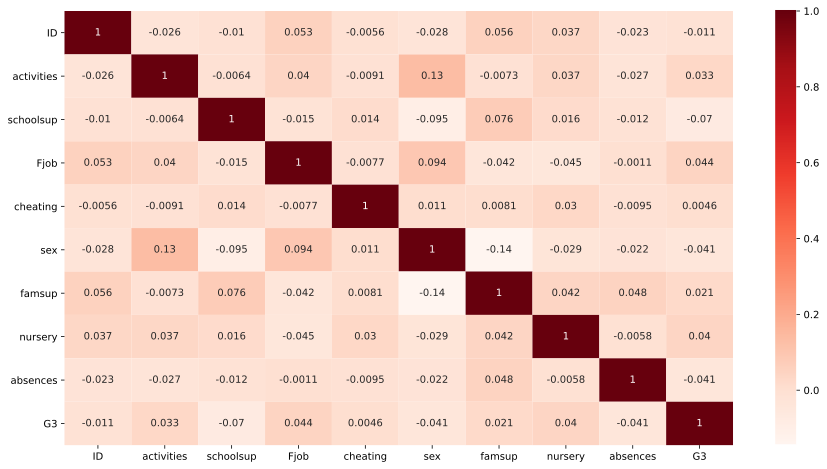

In [15]:
corr_mat = df[['ID', 'activities', 'schoolsup', 'Fjob', 'cheating', 'sex', 'famsup', 'nursery', 'absences', 'G3']].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

plt.show()

По графику видно, что все эти признаки плохо коррелируют с G3, поэтому их можно убрать. 

In [16]:
df.drop(['ID', 'activities', 'schoolsup', 'Fjob', 'cheating', 
         'sex', 'famsup', 'nursery', 'absences'], axis=1, inplace=True) 

Удалим столбец G2, так как его нельзя использовать по заданиям.

In [17]:
df.drop(['G2'], axis=1, inplace=True)

#### Создание нового признака

Попытаемся объединить Walc и Dalc. Они имею хорошую корреляцию, судя по первой лабе.

In [18]:
pd.crosstab(data['Walc'], data['Dalc'])

Dalc,1.0,2.0,3.0,4.0,5.0
Walc,,,,,
1.0,376,4,1,1,1
2.0,172,49,2,2,1
3.0,101,69,16,5,0
4.0,39,56,29,8,0
5.0,9,12,18,10,23


Будем выделять группы следующим образом: 
1. Первая группа те, у кого Dalc = 1 и Walc от 1 до 3
2. Вторая группа те, у кого Dalc = 1 и Walc = 4 или Dalc = 2 и Walc от 1 до 3
3. Третья группа те, у кого Dalc от 2 до 3 и Walc = 4 или Dalc = 3 и Walc от 1 до 3
4. Четвертая группа те, у кого Dalc от 1 до 3 и Walc = 5 или Dalc = 4 и Walc от 1 до 3
5. Пятая группа все остальные 

In [19]:
df['Galc_tmp'] = 5

df.loc[((1 <= df['Walc']) & (df['Walc'] <= 3)) & (df['Dalc'] == 1), 'Galc_tmp'] = 1

df.loc[((1 <= df['Walc']) & (df['Walc'] <= 3)) & (df['Dalc'] == 2), 'Galc_tmp'] = 2
df.loc[(df['Walc'] == 4) & (df['Dalc'] == 1), 'Galc_tmp'] = 2

df.loc[((1 <= df['Walc']) & (df['Walc'] <= 3)) & (df['Dalc'] == 3), 'Galc_tmp'] = 3
df.loc[(df['Walc'] == 4) & ((2 <= df['Dalc']) & (df['Dalc'] <= 3)), 'Galc_tmp'] = 3

df.loc[((1 <= df['Walc']) & (df['Walc'] <= 3)) & (df['Dalc'] == 4), 'Galc_tmp'] = 4
df.loc[(df['Walc'] == 5) & ((1 <= df['Dalc']) & (df['Dalc'] <= 3)), 'Galc_tmp'] = 4

df.insert(loc=23, column='Galc', value=df['Galc_tmp']) 
df = df.drop(['Galc_tmp'], axis=1)

df.drop(['Walc', 'Dalc'], axis=1, inplace=True) 

#### Проверка на линейную независимость

In [20]:
np.linalg.matrix_rank(df)

25

#### Стандартизация

In [21]:
minimax_scaler.fit(df.iloc[:,:])
df.iloc[:,:] = minimax_scaler.transform(df.iloc[:,:])

In [22]:
df

,Subject,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,paid,higher,internet,romantic,famrel,freetime,goout,Galc,health,G1,G3
0,0.5,0.0,0.142857,1.0,0.0,0.0,0.75,1.00,0.75,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.50,0.25,0.00,0.25,1.00,0.789474,0.70
1,0.5,0.0,0.285714,1.0,0.0,1.0,0.75,0.50,0.50,0.000000,0.5,0.000000,0.333333,0.000000,0.0,1.0,1.0,0.0,1.00,0.50,0.75,0.00,0.50,0.894737,0.85
2,0.5,0.0,0.142857,1.0,1.0,1.0,0.25,0.50,0.25,0.000000,0.5,0.333333,0.000000,0.666667,0.0,1.0,1.0,0.0,0.75,0.75,1.00,0.75,1.00,0.473684,0.50
3,0.5,1.0,0.285714,1.0,0.0,1.0,0.50,0.75,0.50,0.333333,0.0,0.333333,0.333333,0.000000,0.0,1.0,1.0,0.0,0.75,0.75,0.50,0.00,0.50,0.736842,0.80
5,0.5,0.0,0.428571,1.0,1.0,1.0,0.75,0.25,0.75,0.000000,0.5,0.333333,0.000000,0.000000,0.0,1.0,1.0,1.0,0.50,0.50,0.75,1.00,0.75,0.578947,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,0.5,0.0,0.142857,1.0,0.0,0.0,0.75,0.25,0.75,0.000000,0.5,0.000000,0.333333,0.000000,0.0,1.0,1.0,0.0,0.25,0.50,0.50,0.25,0.75,0.578947,0.60
1037,0.5,1.0,0.000000,0.0,0.0,1.0,0.75,0.75,0.75,1.000000,0.5,0.000000,0.333333,0.000000,0.0,1.0,1.0,1.0,0.75,1.00,0.75,0.00,0.00,0.684211,0.60
1039,0.0,0.0,0.000000,0.0,0.0,1.0,0.75,0.75,0.75,1.000000,1.0,0.333333,0.666667,0.666667,1.0,1.0,1.0,1.0,0.75,0.25,0.00,0.25,0.50,0.526316,0.50
1040,0.5,0.0,0.000000,0.0,0.0,1.0,0.50,0.25,0.25,1.000000,0.5,0.000000,0.333333,0.000000,0.0,1.0,1.0,1.0,1.00,0.75,0.25,0.00,1.00,0.526316,0.50


## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

Напишем небольшую функцию для более удобного использования метрик

In [23]:
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(true, pred)

    medae = metrics.median_absolute_error(true, pred)

    R2 = metrics.r2_score(true, pred)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

## Вариант с использованием G1

#### Линейная регрессия 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['G3'], axis=1), df['G3'], test_size=0.2, random_state = 1337)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)


LinearRegression()

Оценим ошибку

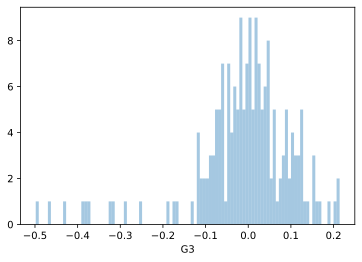

In [25]:
error = y_test - linear.predict(x_test)
sns.distplot(error, bins=100, kde=False)
plt.show()

Напоминает нормальное распределение ошибок

In [26]:
calc_metrics(y_test, linear.predict(x_test)) #тест

MSE:   0.013490050440306992
RMSE:  0.11614667640663245
R2:    0.665464135352922
MAE:   0.07790274088342651
MedAE: 0.0537719988250307


In [27]:
calc_metrics(y_train, linear.predict(x_train)) #трейн

MSE:   0.011627974083055596
RMSE:  0.10783308436215482
R2:    0.6745206147492047
MAE:   0.07129907735057575
MedAE: 0.04751207842272376


#### Гребневая регрессия 

In [28]:
ridge = linear_model.RidgeCV(alphas=np.arange(0, 1000, 1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridge.fit(x_train, y_train)
ridge.alpha_

0

Скорее всего, результат будет аналогичен линейной регрессии, но попробуем другим альфа.

In [29]:
ridge = linear_model.RidgeCV(alphas=np.arange(0, 1, 0.001), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridge.fit(x_train, y_train)
ridge.alpha_

0.13

In [30]:
calc_metrics(y_train, ridge.predict(x_train))

MSE:   0.011629267512994286
RMSE:  0.10783908156598092
R2:    0.6744844102669533
MAE:   0.07120588854907726
MedAE: 0.047991370326245786


#### Лассо регрессия

In [31]:
lasso = linear_model.LassoCV(alphas=np.arange(1, 1000, 10),
                                  cv=5)
lasso.fit(x_train, y_train)
lasso.alpha_

991

In [32]:
calc_metrics(y_test, lasso.predict(x_test))

MSE:   0.040376193174037255
RMSE:  0.20093828200230351
R2:    -0.0012775529938355845
MAE:   0.14424818249096685
MedAE: 0.11336032388663969


С большими альфа модель переобучается, поэтому попробуем альфы по меньше.

In [33]:
lasso = linear_model.LassoCV(alphas=np.arange(0.001, 1, 0.001),
                                  cv=5)
lasso.fit(x_train, y_train)
lasso.alpha_

0.001

In [34]:
calc_metrics(y_test, lasso.predict(x_test))

MSE:   0.013685576453922092
RMSE:  0.11698536854633614
R2:    0.6606153422134773
MAE:   0.07807243437650922
MedAE: 0.05342174525383367


Результат снова налогичен линейной регрессии.

#### Полиномиальная регрессия

In [35]:
poly = PolynomialFeatures(degree=2)
poly.fit(x_train)

poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

poly_reg = linear_model.Ridge(alpha=0)
poly_reg.fit(poly_train, y_train)

calc_metrics(y_test, poly_reg.predict(poly_test))

MSE:   0.027128781554519487
RMSE:  0.16470817087964848
R2:    0.3272411816158973
MAE:   0.11853578629032256
MedAE: 0.0908203125


In [36]:
calc_metrics(y_train, poly_reg.predict(poly_train))

MSE:   0.010649780396990449
RMSE:  0.10319777321720876
R2:    0.7019012983766857
MAE:   0.08064007675438596
MedAE: 0.064453125


Модель переобучилась. Пробуем подобрать значение альфа.

In [37]:
ridge = linear_model.RidgeCV(alphas=np.arange(0, 100, 1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridge.fit(poly_train, y_train)
ridge.alpha_

13

In [38]:
calc_metrics(y_test, ridge.predict(poly_test))

MSE:   0.014618445114984885
RMSE:  0.12090676207303248
R2:    0.6374814017206869
MAE:   0.08010823838766248
MedAE: 0.06024378053937268


In [39]:
calc_metrics(y_train, poly_reg.predict(poly_train))

MSE:   0.010649780396990449
RMSE:  0.10319777321720876
R2:    0.7019012983766857
MAE:   0.08064007675438596
MedAE: 0.064453125


Полиномиальная регрессия переобучается уже во 2 степени, в степенях выше переобучение будет сильнее.

#### Веса признаков

Коэффициенты регуляризации стремятся к 0, а наилучшая степень полинома 1. Поэтому веса признаков для всех этих моделей примерно одинаковые. Рассмотрим веса линейной регрессии.

In [40]:
coefs = pd.Series(linear.coef_, 
                  index=x_train.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1            0.888797
Subject       0.078302
failures     -0.074939
health       -0.026461
Pstatus      -0.024124
goout        -0.023872
Medu          0.023018
romantic     -0.021881
age           0.021351
Fedu         -0.017944
famrel        0.015038
internet      0.012669
address       0.010992
paid          0.008628
higher        0.008242
Galc          0.007023
traveltime    0.006119
school        0.005159
Mjob         -0.004432
studytime    -0.003884
reason        0.003240
famsize       0.002334
guardian      0.001831
freetime      0.001453
dtype: float64

Признак G1 очень сильно влияет на предсказание и это логично, так как от него на прямую зависит итоговая оценка. Значения остальных признаков слишком малы для того, чтобы давать им какую-то интерпритацию, но можно сказать что на оценку влияет Subject и failers.

#### KNN

Для поиска гиперпараметров воспользуемся k-fold.

In [41]:
X = df.drop('G3', axis=1)
Y = df['G3']

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1337)
kf.get_n_splits(X)

5

Подберем метрику и функционал ошибки.

In [43]:
m = ['cityblock', 'euclidean', 'chebyshev', 'canberra'] #взяты такие метрики, так как некоторе давали одинаковые результаты

In [44]:
for i in m:
    knn = KNeighborsRegressor(n_neighbors=8, metric = i)
    knn.fit(x_train, y_train)
    print('\n' + i + ':')
    calc_metrics(y_test, knn.predict(x_test))


cityblock:
MSE:   0.028365675403225814
RMSE:  0.1684211251691005
R2:    0.29656780830386953
MAE:   0.11586021505376344
MedAE: 0.08749999999999991

euclidean:
MSE:   0.030337701612903233
RMSE:  0.17417721324244234
R2:    0.24766409989444982
MAE:   0.12318548387096775
MedAE: 0.09375

chebyshev:
MSE:   0.04096354166666667
RMSE:  0.2023945198533465
R2:    -0.01584303862344072
MAE:   0.1478494623655914
MedAE: 0.10624999999999998

canberra:
MSE:   0.0331012684811828
RMSE:  0.18193754005477483
R2:    0.17913120330663834
MAE:   0.12812500000000002
MedAE: 0.09999999999999998


Похоже, что самая удачная метрика это cityblock.

Проверим какой из функционалов ошибки измениться сильнее при изменении количества соседей

In [45]:
knn = KNeighborsRegressor(n_neighbors=4, metric = 'cityblock')
knn.fit(x_train, y_train)
calc_metrics(y_test, knn.predict(x_test))

MSE:   0.03210433467741936
RMSE:  0.17917682516837763
R2:    0.20385387676984534
MAE:   0.12923387096774194
MedAE: 0.09375


In [46]:
knn = KNeighborsRegressor(n_neighbors=2, metric = 'cityblock')
knn.fit(x_train, y_train)
calc_metrics(y_test, knn.predict(x_test))

MSE:   0.03588373655913979
RMSE:  0.18943003077426712
R2:    0.11012958107911952
MAE:   0.13373655913978497
MedAE: 0.09999999999999998


R2 сильнее всего реагирует на изменение числа соседей. Найдем оптимальное число соседей.

In [47]:
max_average_s = 0
optimal_k = 1
for i in range(1, 100):
    s = 0
    for train_index, test_index in kf.split(X):
        knn = KNeighborsRegressor(n_neighbors=i, metric = 'cityblock')
        knn.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = knn.predict(X.iloc[test_index])
        answ = Y.iloc[test_index]
        s += metrics.r2_score(answ, pr)
    s_average = s/5
    if s_average > max_average_s:
        max_average_s = s_average
        optimal_k  = i
print('k =', optimal_k , 'R2 =', max_average_s)

k = 9 R2 = 0.2831325460002613


Сравним с линейной регрессией и посчитаем ошибку на том кусочке данных, который выбирали для линейной регрессии.

In [48]:
knn = KNeighborsRegressor(n_neighbors=optimal_k , metric = 'cityblock')
knn.fit(x_train, y_train)
calc_metrics(y_test, knn.predict(x_test))

MSE:   0.029145260852250103
RMSE:  0.17071983145566336
R2:    0.27723509391487233
MAE:   0.11789127837514934
MedAE: 0.08333333333333337


KNN работает хуже, чем линейная регрессия. (R2 близок к нулю)

#### Radius Neighbors

Методом тыка получил, что наилучшие результаты у евклидовой(с радиусом около 1.5) и косинусной(с радиусом близким к 0). С помощью k-fold валидации найдём точный радиус.

In [49]:
max_average_s = 0
optimal_r = 2
for i in np.arange(1, 2, 0.001):
    s = 0
    for train_index, test_index in kf.split(X):
        rn = RadiusNeighborsRegressor(radius=i, metric='euclidean')
        rn.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = rn.predict(X.iloc[test_index])
        pr = np.nan_to_num(pr, nan=np.mean(Y.iloc[test_index]))
        answ = Y.iloc[test_index]
        s += metrics.r2_score(answ, pr)
    s_average = s/5
    if s_average > max_average_s:
        max_average_s = s_average
        optimal_r  = i
print('r =', optimal_r , 'R2 =', max_average_s)

r = 1.6379999999999297 R2 = 0.2148970111074613


In [50]:
max_average_s = 0
optimal_r = 2
for i in np.arange(0.001, 0.2, 0.001):
    s = 0
    for train_index, test_index in kf.split(X):
        rn = RadiusNeighborsRegressor(radius=i, metric = 'cosine')
        rn.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = rn.predict(X.iloc[test_index])
        pr = np.nan_to_num(pr, nan=np.mean(Y.iloc[test_index]))
        answ = Y.iloc[test_index]
        s += metrics.r2_score(answ, pr)
    s_average = s/5
    if s_average > max_average_s:
        max_average_s = s_average
        optimal_r  = i
print('r =', optimal_r , 'R2 =', max_average_s)

r = 0.137 R2 = 0.21620729301521885


Косинусная немного лучше, поэтому для сравнения этой модели с другими будем использовать её.

In [51]:
rn = RadiusNeighborsRegressor(radius=0.137, metric = 'cosine')
rn.fit(x_train, y_train)
y_pred_rn = rn.predict(x_test)
y_pred_rn = np.nan_to_num(y_pred_rn, nan=np.mean(y_test))
calc_metrics(y_test, y_pred_rn)

MSE:   0.032471101638067074
RMSE:  0.18019739631322942
R2:    0.19475852884307565
MAE:   0.12781293152759668
MedAE: 0.09277777777777774


Результат R2 очень низкий.

#### Дерево решений

Подберем гиперпараметры min_samples_split и min_samples_leaf.

In [52]:
dtree = DecisionTreeRegressor()
params = {'min_samples_split': np.arange(2, 31),
          'min_samples_leaf': np.arange(1, 16)}


grid_tree = GridSearchCV(dtree, params) 

In [53]:
grid_tree.fit(x_train, y_train)
print('min_samples_split:', grid_tree.best_estimator_.min_samples_split, 
      '\nmin_samples_leaf:', grid_tree.best_estimator_.min_samples_leaf)

min_samples_split: 28 
min_samples_leaf: 13


In [54]:
dtree = DecisionTreeRegressor(min_samples_split=grid_tree.best_estimator_.min_samples_split,
                            min_samples_leaf=grid_tree.best_estimator_.min_samples_leaf )
dtree.fit(x_train, y_train)
calc_metrics(y_test, dtree.predict(x_test))

MSE:   0.01568631236494704
RMSE:  0.1252450093414785
R2:    0.6109996702123311
MAE:   0.08707263615604131
MedAE: 0.06428571428571417


Подберем параметр max_depth.

In [55]:
dtree = DecisionTreeRegressor()
params = {'max_depth': np.arange(1,15)}


grid_tree = GridSearchCV(dtree, params)

In [56]:
grid_tree.fit(x_train, y_train)
print('max_depth:', grid_tree.best_estimator_.max_depth)

max_depth: 3


In [57]:
dtree = DecisionTreeRegressor(max_depth=grid_tree.best_estimator_.max_depth)
dtree.fit(x_train, y_train)
calc_metrics(y_test, dtree.predict(x_test))

MSE:   0.014897850443012301
RMSE:  0.12205675091125563
R2:    0.6305525096893148
MAE:   0.08117784966789633
MedAE: 0.06101694915254241


Дерево глубины 4 оказалось чуть лучше.

#### Random forest

In [58]:
rf = RandomForestRegressor(max_depth=grid_tree.best_estimator_.max_depth, random_state=1337)
rf.fit(x_train, y_train)
calc_metrics(y_test, rf.predict(x_test))

MSE:   0.014617601081746496
RMSE:  0.12090327159240355
R2:    0.6375023326571905
MAE:   0.08030241415731354
MedAE: 0.05692005885631091


Проверим на переобучение.

In [59]:
calc_metrics(y_train, rf.predict(x_train))

MSE:   0.011331736376581214
RMSE:  0.10645062882191544
R2:    0.6828126238216957
MAE:   0.07126910862060838
MedAE: 0.05082716701594103


Таким образом, мы почти приблизились к результату линейной регрессии.

#### Итог

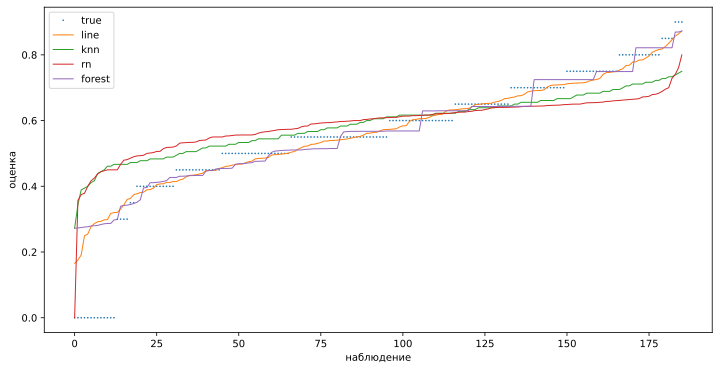

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test.sort_values(ascending = True).values, label='true', marker='o', linewidth = 0, ms = 0.7)
plt.plot(sorted(linear.predict(x_test).tolist()), label='line', linewidth = 1)
plt.plot(sorted(knn.predict(x_test).tolist()), label='knn', linewidth = 1)
plt.plot(sorted(y_pred_rn.tolist()), label='rn', linewidth = 1)
plt.plot(sorted(rf.predict(x_test).tolist()), label='forest', linewidth = 1)

plt.xlabel("наблюдение")
plt.ylabel("оценка")

plt.legend(loc='best')

plt.show()

Лучше всего себя показала линейная регрессия в сравнении с другими моделями. Деревья оказали практически аналогичный результат. Метрические модели оказались слабее.

## Вариант без G1

#### Линейная регрессия

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['G3', 'G1'], axis=1), df['G3'], test_size=0.2, random_state = 1337)

In [62]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

calc_metrics(y_test, linear.predict(x_test))

MSE:   0.032729148692934605
RMSE:  0.1809119915675426
R2:    0.1883592944590583
MAE:   0.1306149518880036
MedAE: 0.09491185314888395


In [63]:
calc_metrics(y_train, linear.predict(x_train))

MSE:   0.025564576050455718
RMSE:  0.1598892618359836
R2:    0.2844202749622048
MAE:   0.11710608093883502
MedAE: 0.08973147556770411


#### Полиномиальная регрессия

In [64]:
poly = preprocessing.PolynomialFeatures(degree=3)
poly.fit(x_train)

poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

poly_reg = linear_model.Ridge(alpha=0)
poly_reg.fit(poly_train, y_train)

calc_metrics(y_test, poly_reg.predict(poly_test))

MSE:   0.12825541428794177
RMSE:  0.35812765082850245
R2:    -2.180568975953316
MAE:   0.28551750218251876
MedAE: 0.24612411512500587


In [65]:
calc_metrics(y_train, poly_reg.predict(poly_train))

MSE:   6.704811361400107e-25
RMSE:  8.188291251170849e-13
R2:    1.0
MAE:   5.550043293441247e-13
MedAE: 4.2577052994374753e-13


Из-за переобучения, воспользуемся регуляризацией.

In [66]:
ridge = linear_model.RidgeCV(alphas=np.arange(160, 180, 1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridge.fit(poly_train, y_train)
ridge.alpha_

177

In [67]:
calc_metrics(y_test, ridge.predict(poly_test))

MSE:   0.033126780673836495
RMSE:  0.18200763905352021
R2:    0.17849853380949943
MAE:   0.12980402503157656
MedAE: 0.08780679060649438


Получилось хуже, чем у линейной. Проверим полином 2 степени.

In [68]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly.fit(x_train)

poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

poly_reg = linear_model.Ridge(alpha=0)
poly_reg.fit(poly_train, y_train)

calc_metrics(y_test, poly_reg.predict(poly_test))

MSE:   0.04749663978494625
RMSE:  0.2179372381786698
R2:    -0.17785545195679786
MAE:   0.15756048387096774
MedAE: 0.11874999999999997


In [69]:
ridge = linear_model.RidgeCV(alphas=np.arange(1, 100, 1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridge.fit(poly_train, y_train)
ridge.alpha_

22

In [70]:
calc_metrics(y_test, ridge.predict(poly_test))

MSE:   0.032763542496910915
RMSE:  0.1810070233358665
R2:    0.18750637244793378
MAE:   0.12955377630543075
MedAE: 0.08753950562310353


Поулчилось конечно лучше, чем степени 3, но все равно не очень (Сужу по R2)

#### KNN

In [71]:
X = df.drop(['G3', 'G1'], axis=1)
Y = df['G3']

In [72]:
max_average_s = 0
optimal_k = 1
for i in range(1, 100):
    s = 0
    for train_index, test_index in kf.split(X):
        knn = KNeighborsRegressor(n_neighbors=i, metric = 'cityblock')
        knn.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = knn.predict(X.iloc[test_index])
        answ = Y.iloc[test_index]
        s += metrics.r2_score(answ, pr)
    s_average = s/5
    if s_average > max_average_s:
        max_average_s = s_average
        optimal_k  = i
print('k =', optimal_k , 'R2 =', max_average_s)

k = 21 R2 = 0.15294424360297776


In [73]:
knn = KNeighborsRegressor(n_neighbors=optimal_k , metric = 'cityblock')
knn.fit(x_train, y_train)
calc_metrics(y_test, knn.predict(x_test))

MSE:   0.03604296198766246
RMSE:  0.1898498406311221
R2:    0.10618099566497785
MAE:   0.13361495135688686
MedAE: 0.09642857142857147


#### Radius Neighbors

In [74]:
max_average_s = 0
optimal_r = 2
for i in np.arange(0.001, 0.2, 0.001):
    s = 0
    for train_index, test_index in kf.split(X):
        rn = RadiusNeighborsRegressor(radius=i, metric = 'cosine')
        rn.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = rn.predict(X.iloc[test_index])
        pr = np.nan_to_num(pr, nan=np.mean(Y.iloc[test_index]))
        answ = Y.iloc[test_index]
        s += metrics.r2_score(answ, pr)
    s_average = s/5
    if s_average > max_average_s:
        max_average_s = s_average
        optimal_r  = i
print('r =', optimal_r , 'R2 =', max_average_s)

r = 0.134 R2 = 0.16862149794079911


In [75]:
rn = RadiusNeighborsRegressor(radius=0.134, metric = 'cosine')
rn.fit(x_train, y_train)
y_pred_rn = rn.predict(x_test)
y_pred_rn = np.nan_to_num(y_pred_rn, nan=np.mean(y_test))
calc_metrics(y_test, y_pred_rn)

MSE:   0.033813571571308064
RMSE:  0.18388466921227573
R2:    0.16146700470335873
MAE:   0.13039043956826604
MedAE: 0.10086206896551728


#### Дерево решений

In [76]:
dtree = DecisionTreeRegressor()
params = {'min_samples_split': np.arange(1, 100),
          'min_samples_leaf': np.arange(1, 16)}


grid_tree = GridSearchCV(dtree, params) 

In [77]:
grid_tree.fit(x_train, y_train)
print('min_samples_split:', grid_tree.best_estimator_.min_samples_split, 
      '\nmin_samples_leaf:', grid_tree.best_estimator_.min_samples_leaf)

min_samples_split: 98 
min_samples_leaf: 15


In [78]:
dtree = DecisionTreeRegressor(min_samples_split=grid_tree.best_estimator_.min_samples_split,
                            min_samples_leaf=grid_tree.best_estimator_.min_samples_leaf )
dtree.fit(x_train, y_train)
calc_metrics(y_test, dtree.predict(x_test))

MSE:   0.034411009152871465
RMSE:  0.1855020462228691
R2:    0.1466513226712296
MAE:   0.13511739140852758
MedAE: 0.09301948051948059


In [79]:
dtree = DecisionTreeRegressor()
params = {'max_depth': np.arange(1,15)}


grid_tree = GridSearchCV(dtree, params) 

In [80]:
grid_tree.fit(x_train, y_train)
print('max_depth:', grid_tree.best_estimator_.max_depth)

max_depth: 2


In [81]:
dtree = DecisionTreeRegressor(max_depth=grid_tree.best_estimator_.max_depth)
dtree.fit(x_train, y_train)
calc_metrics(y_test, dtree.predict(x_test))

MSE:   0.03340462786184175
RMSE:  0.18276932965309511
R2:    0.17160828164251174
MAE:   0.13348623956486624
MedAE: 0.08415387681881609


#### Random forest

In [82]:
rf = RandomForestRegressor(random_state=1337)
rf.fit(x_train, y_train)
calc_metrics(y_test, rf.predict(x_test))

MSE:   0.03338260752688173
RMSE:  0.18270907893939406
R2:    0.17215435756923025
MAE:   0.13078494623655917
MedAE: 0.09174999999999994


In [83]:
calc_metrics(y_train, rf.predict(x_train))

MSE:   0.003988488529014848
RMSE:  0.06315448146422269
R2:    0.8883579559748668
MAE:   0.04526315789473686
MedAE: 0.03250000000000042


Плохо без параметров жить, будем подбирать.

In [84]:
rf = RandomForestRegressor(random_state=1337, max_depth=5)
rf.fit(x_train, y_train)

calc_metrics(y_test, rf.predict(x_test))

MSE:   0.03213367723917477
RMSE:  0.17925868804377312
R2:    0.20312621905564765
MAE:   0.12932767586375565
MedAE: 0.09191748589519966


In [85]:
calc_metrics(y_train, rf.predict(x_train))

MSE:   0.018581887119299353
RMSE:  0.1363153957530086
R2:    0.4798731788366759
MAE:   0.10170070409487526
MedAE: 0.07572194830294998


#### Итог

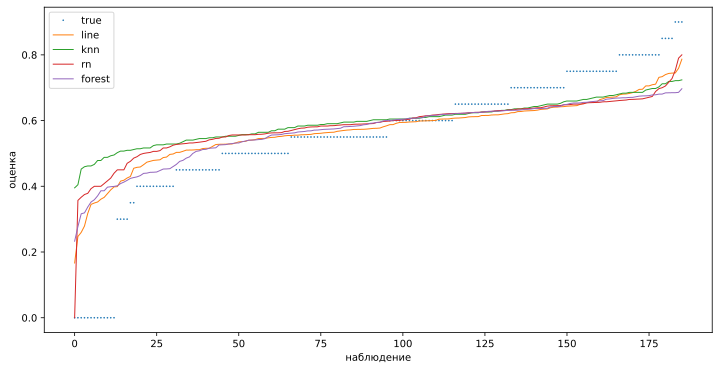

In [86]:
plt.figure(figsize=(12,6))
plt.plot(y_test.sort_values(ascending = True).values, label='true', marker='o', linewidth = 0, ms = 0.7)
plt.plot(sorted(linear.predict(x_test).tolist()), label='line', linewidth = 1)
plt.plot(sorted(knn.predict(x_test).tolist()), label='knn', linewidth = 1)
plt.plot(sorted(y_pred_rn.tolist()), label='rn', linewidth = 1)
plt.plot(sorted(rf.predict(x_test).tolist()), label='forest', linewidth = 1)

plt.xlabel("наблюдение")
plt.ylabel("оценка")

plt.legend(loc='best')

plt.show()

Radius Neighbors в варианте без G1 показал результат лучше, чем у KNN, но с G1 это былa худшая модель. Полином степени 2 хотя и немного отстаёт от леса, но его обобщающая способность вероятно намного выше. Остальные алгоритмы показали себя значительно хуже. Как и ожидалось в случаес с G1 все модели отработали лучше.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


Создадим признак passed

In [87]:
df['passed'] = 1
df.loc[(df['G3'] < 0.4), 'passed'] = 0

In [88]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['G1', 'G3', 'passed'], axis=1), df['passed'], test_size=0.2,  
                                                   random_state=1337)

In [89]:
y_train.value_counts(normalize=True)

1    0.901484
0    0.098516
Name: passed, dtype: float64

In [90]:
y_test.value_counts(normalize=True)

1    0.897849
0    0.102151
Name: passed, dtype: float64

Данные не очень сбалансированные.

In [91]:
def get_model_quality(test_label, preds): #функиця дает конфьяжен матрикс
    print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

    print()
    print(metrics.classification_report(test_label, preds))

    plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                          target_names=['0', '1'],
                          normalize=True)
    

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [92]:
X = df.drop(['G3', 'G1', 'passed'], axis=1)
Y = df['passed']

In [93]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1337)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
        dt = DecisionTreeClassifier(max_depth=5)
        dt.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = dt.predict(X.iloc[test_index])
        answ = Y.iloc[test_index]
        print('f1 =', metrics.f1_score(answ, pr))

f1 = 0.9198813056379822
f1 = 0.9542857142857143
f1 = 0.936046511627907
f1 = 0.9387755102040816
f1 = 0.924924924924925


In [94]:
for train_index, test_index in kf.split(X):
        dt = DecisionTreeClassifier(max_depth=5)
        dt.fit(X.iloc[train_index], Y.iloc[train_index])
        pr = dt.predict(X.iloc[train_index])
        answ = Y.iloc[train_index]
        print('f1 =', metrics.f1_score(answ, pr))

f1 = 0.963944076526858
f1 = 0.9602356406480118
f1 = 0.9620437956204378
f1 = 0.9642596644784829
f1 = 0.9650145772594751


Строить будем второе дерево, так как разница f1 меньше всего.

In [95]:
ind_tr = list(kf.split(X))[1][0]
ind_test = list(kf.split(X))[1][1]

x_train_kf = X.iloc[ind_tr]
y_train_kf = Y.iloc[ind_tr]

x_test_kf = X.iloc[ind_test]
y_test_kf = Y.iloc[ind_test]

In [96]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_kf, y_train_kf)

dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=x_train_kf.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("dtree_score_1337.pdf") 

'dtree_score_1337.pdf.pdf'

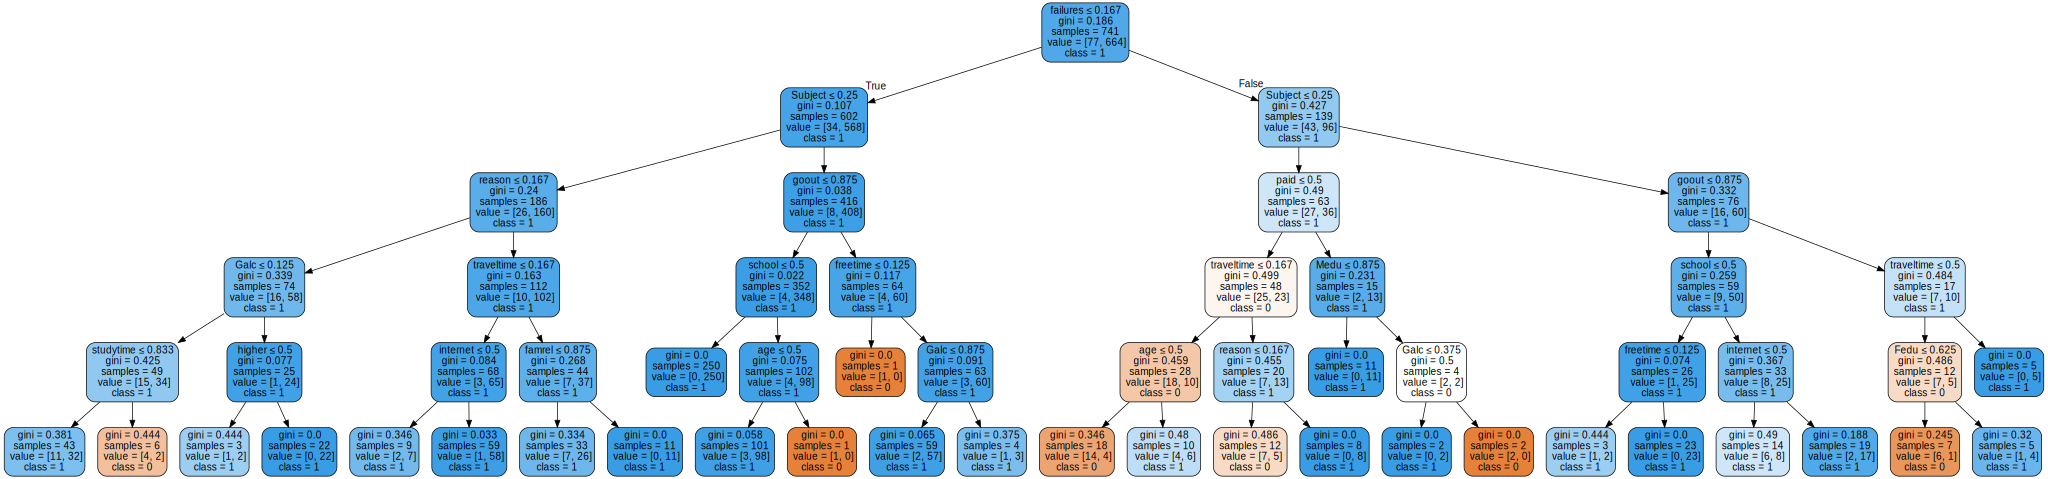

In [97]:
display(graph)

Сначала наблюдение проверяется на признак failures. Это логично, потому что он влияет на оценку сильнее всего (после G1, который использовать запретили). Далее проверяется на предмет: тоже логично, так как предметы совсем разные и для того, чтобы получить зачет нужны разные умения. Все описывать не буду, так как все видно на картиночке :)
Вообще, не много напрягают признаки, из которых наблюдения в любом случае попадут в один класс (например из higher, internet и famrel наблюдения в любом случае попадут в класс сдавших)
В целом, большинство попадают в класс сдавших, так как имеют мало задолжностей (в первой лабе зависимость оценки от долгов тоже была замечена).
Остальные деревья, полагаю, будут сильнее переобучеными из-за большой разницы между f1.

In [98]:
preds = dt.predict(x_test_kf)

Accuracy: 0.91398 
Balanced accuracy: 0.5883

              precision    recall  f1-score   support

           0       0.43      0.20      0.27        15
           1       0.93      0.98      0.95       171

    accuracy                           0.91       186
   macro avg       0.68      0.59      0.61       186
weighted avg       0.89      0.91      0.90       186



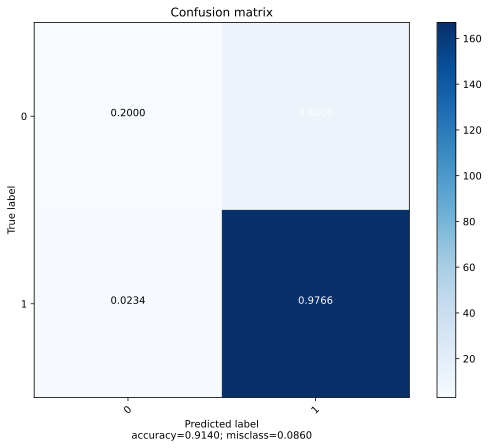

In [99]:
get_model_quality(y_test_kf, preds)

Пробовал строить и другие деревья, но это мне нравится больше, так как условия более логичны: сначала узнаем фейлы, потом спрашиваем а что собственно за предмет и так далее. К тому же, значение Accuracy самое высокое у данного дерева. Но все равно: целых 80% True 0 отнесено в класс 1 (скорее всего такие бешеные числа связаны с несбалансированными данными: большинство все таки сдали)

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [100]:
X = df.drop(['G3', 'G1', 'passed'], axis=1)
Y = df['passed']

In [101]:
%%time
f1_score = []
for i in range(1, 100):
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state = 1337)
    rf = RandomForestClassifier(n_estimators = i, random_state = 1337)
    scores_dtree = cross_val_score(rf, X, Y, cv=rskf, scoring='f1_micro')
    f1_score.append(np.mean(scores_dtree))

Wall time: 2min 22s


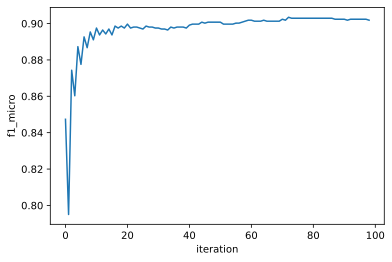

In [102]:
pd.Series(f1_score).plot()

plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.show()

Видно, что метрика перестанет меняться при значении количества деревьев 20-25 и выше.
Пусть количество деревьев равно 22.

Accuracy: 0.89785 
Balanced accuracy: 0.52332

              precision    recall  f1-score   support

           0       0.50      0.05      0.10        19
           1       0.90      0.99      0.95       167

    accuracy                           0.90       186
   macro avg       0.70      0.52      0.52       186
weighted avg       0.86      0.90      0.86       186



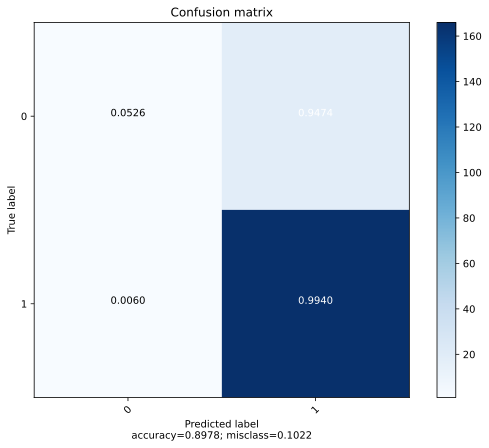

In [103]:
rf = RandomForestClassifier(n_estimators = 22, random_state=1337)
rf.fit(x_train, y_train)

get_model_quality(y_test, rf.predict(x_test))

Accuracy выглядит чуть хуже, чем просто дерево решений. Так же упал процент угаданных классов 0, но повысился процент угаданных классов 1. Косяк с тем, что большинство наблюдений из класса 0 мы вгоняем в 1, можно связать с малым числом представителей из класса 0.

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

В прошлом задании решили, что 22 дерева подходит в самый раз, поэтому тут не будем подбирать n_estimators

In [104]:
params = [
    {
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2)
    },
    
    {
        'bootstrap': [False], 
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2) 
    }
]


In [105]:
rf = RandomForestClassifier(n_estimators = 22, random_state=1337)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 1337)

clf = GridSearchCV(rf, params, cv=skf, scoring='f1_micro', n_jobs=5)

In [106]:
%%time
clf.fit(X, Y)

Wall time: 23min 58s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=22,
                                              random_state=1337),
             n_jobs=5,
             param_grid=[{'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11)},
                         {'bootstrap': [False], 'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11)}],
             scoring='f1_micro')

In [107]:
clf.best_score_

0.9093868061609998

In [108]:
clf.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

Обучим алгоритм с данными параметрами.

In [109]:
rf = RandomForestClassifier(n_estimators = 22,
                            max_depth = 8,
                            max_features = 10,
                            min_samples_leaf = 7,
                            min_samples_split = 2,
                            random_state=1337)


In [110]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.Series(cross_val_score(rf, X, Y, cv=rskf, scoring='f1_micro'))


In [111]:
scores.describe()

count    10.000000
mean      0.901293
std       0.005723
min       0.897297
25%       0.897435
50%       0.897849
75%       0.902703
max       0.913978
dtype: float64

Неплохо, среднее значение 0,9.

In [112]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=7,
                       n_estimators=22, random_state=1337)

Accuracy: 0.9086 
Balanced accuracy: 0.9538

              precision    recall  f1-score   support

           0       0.11      1.00      0.19         2
           1       1.00      0.91      0.95       184

    accuracy                           0.91       186
   macro avg       0.55      0.95      0.57       186
weighted avg       0.99      0.91      0.94       186



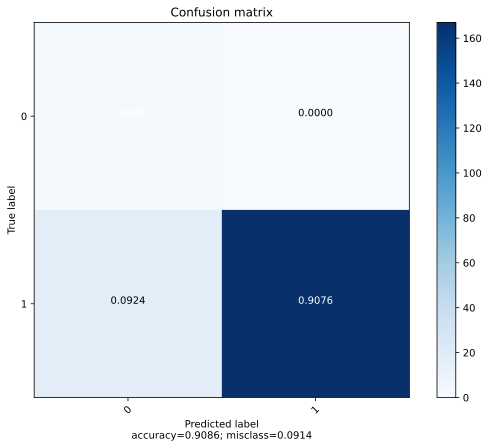

In [113]:
get_model_quality(rf.predict(x_test), y_test)

Очень высокий результат: Accuracy и Balanced accuracy очень высокие по сравнению с деревом решения. Так же, точно угадали класс 0 и совсем немного не угадали класс 1.

Посчитаем F1 для каждого дерева отдельно и построим boxplot.

In [114]:
scores = pd.Series(
    [
        metrics.f1_score(y_test, 
                         x.predict(x_test)) for x in rf.estimators_
    ]
)

In [115]:
scores

0     0.942197
1     0.944282
2     0.909639
3     0.939828
4     0.914634
5     0.945245
6     0.932945
7     0.932945
8     0.921687
9     0.930514
10    0.938416
11    0.904192
12    0.912913
13    0.941520
14    0.937685
15    0.928571
16    0.930636
17    0.920354
18    0.930636
19    0.933718
20    0.937685
21    0.942197
dtype: float64

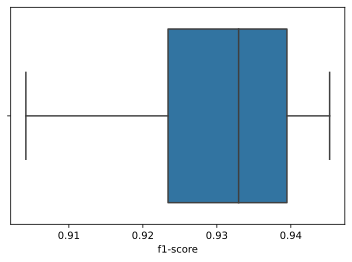

In [116]:
sns.boxplot(scores)
plt.xlabel('f1-score')
plt.show()

In [117]:
metrics.f1_score(y_test, rf.predict(x_test)) #весь ансамбль

0.9515669515669516

В основном значения f1 лежат между 0.925 и 0.939, а среднее значения около 0.933.
Как видим, f1 у ансамбля чуть выше, чем максимальное f1 у одного дерева.

Выведем важность признаков в Random Forest

In [118]:
rf.feature_importances_

array([0.15476441, 0.00730859, 0.04884858, 0.01944662, 0.01624477,
       0.00320218, 0.01214596, 0.04017337, 0.04557088, 0.04586635,
       0.0063946 , 0.03208986, 0.01837839, 0.2035785 , 0.03240103,
       0.05732048, 0.01259381, 0.01945746, 0.01719226, 0.0432766 ,
       0.09827922, 0.02975371, 0.03571237])

In [119]:
pd.Series(rf.feature_importances_, 
          index=X.columns).sort_values(ascending=False)

failures      0.203578
Subject       0.154764
goout         0.098279
higher        0.057320
age           0.048849
reason        0.045866
Mjob          0.045571
freetime      0.043277
Fedu          0.040173
health        0.035712
paid          0.032401
traveltime    0.032090
Galc          0.029754
romantic      0.019457
address       0.019447
studytime     0.018378
famrel        0.017192
famsize       0.016245
internet      0.012594
Medu          0.012146
school        0.007309
guardian      0.006395
Pstatus       0.003202
dtype: float64

Получили практически ту же зависмость, что и в линейной регрессии (по крайней мере первые два совпадают). Как и показывало обычное дерево решений, очень важными при получении оценки являются признаки failures, subject и goout.
Можно было бы вывести признаки отдельно для какого-то дерева, но ограничимся всеми деревьями сразу, так как они более вместе более точные, нежели деревья по отдельности.

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [120]:
log = LogisticRegression(max_iter=10000, random_state=1337)
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

scores_roc = cross_val_score(log, X, Y, cv=skf, scoring='roc_auc')
print('roc_auc_mean =', np.mean(scores_roc))

roc_auc_mean = 0.7861329971635675


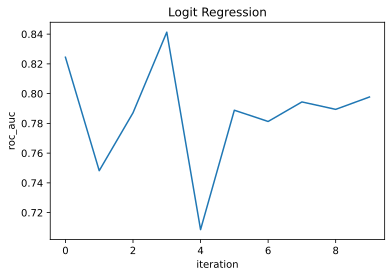

In [121]:
pd.Series(scores_roc).plot()
plt.ylabel('roc_auc')
plt.xlabel('iteration')
plt.title('Logit Regression')
plt.show()

Иногда довольно сильно падает roc_auc.

In [138]:
log = LogisticRegression(max_iter=10000, random_state=1337)
log.fit(x_train, y_train)


LogisticRegression(max_iter=10000, random_state=1337)

Accuracy: 0.9086 
Balanced accuracy: 0.83104

              precision    recall  f1-score   support

           0       0.16      0.75      0.26         4
           1       0.99      0.91      0.95       182

    accuracy                           0.91       186
   macro avg       0.58      0.83      0.61       186
weighted avg       0.98      0.91      0.94       186



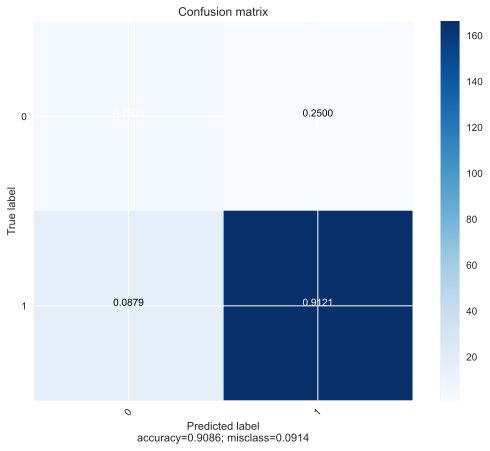

In [139]:
get_model_quality(log.predict(x_test), y_test)

In [124]:
metrics.roc_auc_score(y_test, log.predict(x_test))

0.5759533564450048

In [125]:
preds_prob = log.predict_proba(x_test)[:,1]

Построим распределение вероятностей для каждого класса.

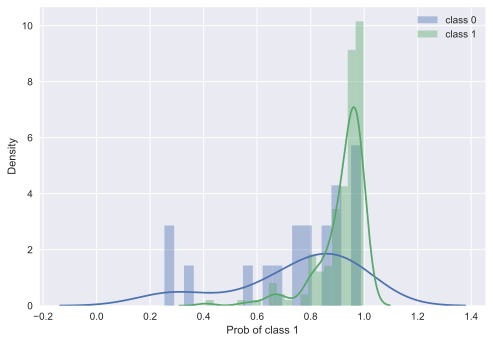

In [127]:
sns.distplot(preds_prob[y_test == 0], hist=True, bins=20, rug=False, label='class 0')
sns.distplot(preds_prob[y_test == 1], hist=True, bins=20, rug=False, label='class 1')
plt.legend()
plt.xlabel('Prob of class 1')
plt.show()

Смущают пики графиков, так как они находятся на одной стороне. Попробуем увеличить значимость класса '0', так как их меньшинство.

Accuracy: 0.7043 
Balanced accuracy: 0.58888

              precision    recall  f1-score   support

           0       0.74      0.22      0.34        64
           1       0.70      0.96      0.81       122

    accuracy                           0.70       186
   macro avg       0.72      0.59      0.57       186
weighted avg       0.71      0.70      0.65       186



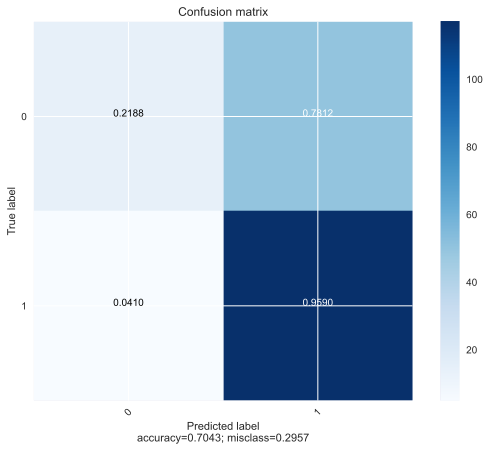

In [140]:
log = LogisticRegression(max_iter=10000, class_weight = {1: 1, 0: 10}, random_state=1337)
log.fit(x_train, y_train)

get_model_quality(log.predict(x_test), y_test)

In [129]:
metrics.roc_auc_score(y_test, log.predict(x_test))

0.7187204538291838

In [130]:
preds_prob = log.predict_proba(x_test)[:,1]

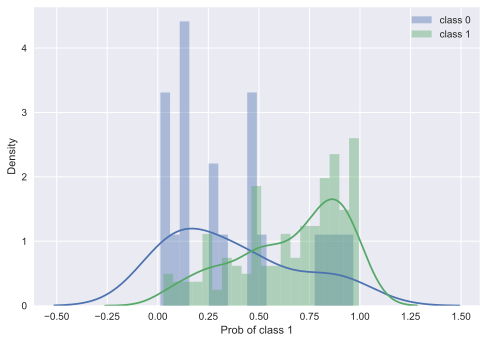

In [131]:
sns.distplot(preds_prob[y_test == 0], hist=True, bins=20, rug=False, label='class 0')
sns.distplot(preds_prob[y_test == 1], hist=True, bins=20, rug=False, label='class 1')
plt.legend()
plt.xlabel('Prob of class 1')
plt.show()

Увеличением значимости класса '0' удалось добиться разделения пиков графиков и увеличить roc_auc. Кроме того, удалось поднять precision у класс 0, но recall довольно сильно упал. Так не вышло стабилизовровать нормально recall и precision.

Сравнивая с Random Forest можно сказать, что у логистической регрессии класс 0 имеет presecion намного выше, чем RF и recall у класса 1 чуть выше. В остальном дерево RF превосходит ее. 

Построим ROC - кривую для дерева и логистической регрессии.

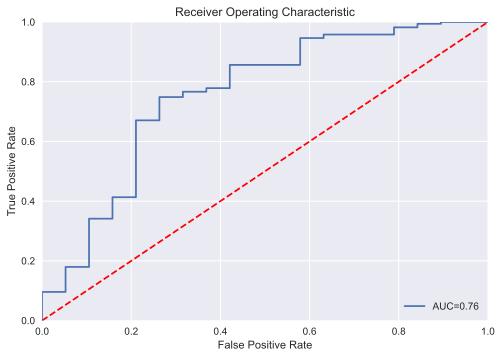

In [135]:
style.use('seaborn')
plot_roc(y_test, log.predict_proba(x_test)[:,1])

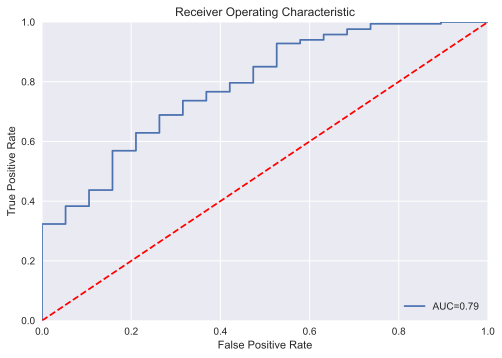

In [136]:
style.use('seaborn')
plot_roc(y_test, rf.predict_proba(x_test)[:,1])

В целом графики похожи и разница AUC составляет всего 0.03, но RF приближается к 1 чуть быстрее в отличие от LR.

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [155]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, booster = 'gbtree', random_state = 1337)
xgb_model.fit(x_train, y_train)

[19:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=1337, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy: 0.88172 
Balanced accuracy: 0.62147

              precision    recall  f1-score   support

           0       0.16      0.33      0.21         9
           1       0.96      0.91      0.94       177

    accuracy                           0.88       186
   macro avg       0.56      0.62      0.58       186
weighted avg       0.93      0.88      0.90       186



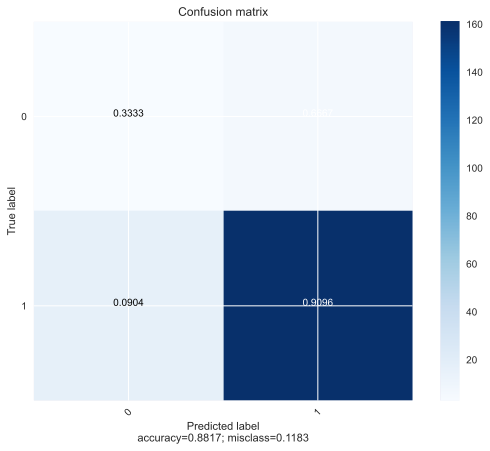

In [156]:
get_model_quality(xgb_model.predict(x_test), y_test)

На дефолтных параметрах получили довольно неплохую модель, но предсказания в классе 0 немного расстраивают.

Подберем параметр lerning_rate и другие.

In [184]:
eta_scores = {'n_trees':[10, 20, 50, 100, 200, 500]}
eta_values = [0.01, 0.05, 0.1, 0.3, 0.5, 1]


In [185]:
%%time
for eta in eta_values:
    eta_scores['eta ' + str(eta)] = [np.mean(cross_val_score(xgb.XGBClassifier(n_estimators=n, 
                                                                               learning_rate=eta, 
                                                                               use_label_encoder=False, 
                                                                               n_jobs=6, 
                                                                               verbosity=0),
                                                               X, 
                                                               Y,
                                                               cv=skf, 
                                                               scoring='f1_micro')
                                            ) for n in eta_scores['n_trees']
                                    ]

Wall time: 43.9 s


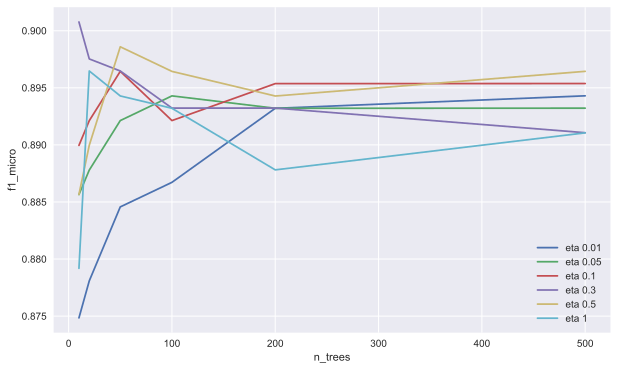

In [186]:
pd.DataFrame(eta_scores).plot(x='n_trees', figsize=(10, 6))
plt.ylabel('f1_micro')
plt.show()

eta = 0.3 - самый худший вариант, так как быстро начинает переобучаться и F1 уменьшается.

eta со значением  0.05, 0.1, 0.5 примерно одинаково себя ведут.

eta = 0.01 при мальком колчестве деревьев имело маленькое f1, но потом начало увеличиваться и приблизилась к eta = 0.05, 0.1, 0.5.

eta = 1 - как-то скачет, то вниз то вверх.

Выберем eta = 0.5 так как достигает пика на малом число деревьев, а при больших (больше 200) начинает расти верх. (можно было бы взять 0.3, но оно показывает хороший результат лишь на малом числе деревьев и при их увеличении снижается)

In [200]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False,
                              booster = 'gbtree',
                              eta = 0.5,
                              n_estimators = 50,
                              random_state = 1337)

In [201]:
params = [
    {
        'gamma': range(0, 10),
        'max_depth': range(5, 12),
        'min_child_weight': range(1, 12),
    }
]

clf = GridSearchCV(xgb_model, params, cv=skf, scoring='f1_micro', n_jobs=5)

In [202]:
%%time
clf.fit(X, Y)

Wall time: 2min 59s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eta=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weig...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     num_parallel_tree=None, random_state=1337,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subs

In [203]:
clf.best_params_

{'gamma': 5, 'max_depth': 7, 'min_child_weight': 1}

In [204]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False,
                              booster = 'gbtree',
                              gamma = 5,
                              max_depth = 7,
                              min_child_weight = 1,
                              n_estimators = 50,
                              eta = 0.5,
                              random_state = 1337)


Accuracy: 0.90323 
Balanced accuracy: 0.78689

              precision    recall  f1-score   support

           0       0.11      0.67      0.18         3
           1       0.99      0.91      0.95       183

    accuracy                           0.90       186
   macro avg       0.55      0.79      0.57       186
weighted avg       0.98      0.90      0.94       186



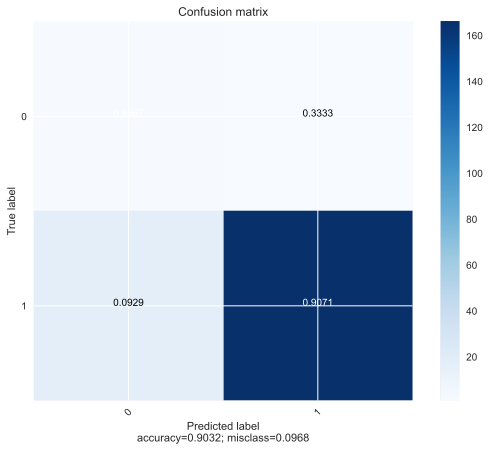

In [205]:
xgb_model.fit(x_train, y_train)
get_model_quality(xgb_model.predict(x_test), y_test)

Нам удалось немного повысить показатели по сравнению с дефолтными параметрами. Данная модель немного уступает RF и немного лучше остальных.

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [206]:
df['G4'] = 0
df.loc[(0.90 <= df['G3']), 'G4'] = 3
df.loc[(0.70 <= df['G3']) & (df['G3'] <= 0.85), 'G4'] = 2
df.loc[(0.40 <= df['G3']) & (df['G3'] <= 0.65), 'G4'] = 1

In [207]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['G1', 'G3', 'passed', 'G4'], 
                                                              axis=1), df['G4'], random_state=1337)

In [208]:
y_train.value_counts(normalize=True)

1    0.635971
2    0.197122
0    0.141007
3    0.025899
Name: G4, dtype: float64

In [209]:
y_test.value_counts(normalize=True)

1    0.616379
2    0.228448
0    0.116379
3    0.038793
Name: G4, dtype: float64

Видно, что представителей класса 3 довольно мало, будет многое портить.

#### KNN

In [265]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 100)}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

grid_knn = GridSearchCV(knn, params, scoring='f1_macro')

In [266]:
%%time
grid_knn.fit(x_train, y_train)
grid_knn.best_estimator_.n_neighbors

Wall time: 8.94 s


1

In [267]:
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_estimator_.n_neighbors)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.15      0.19      0.17        27
           1       0.68      0.70      0.69       143
           2       0.35      0.32      0.33        53
           3       0.00      0.00      0.00         9

    accuracy                           0.53       232
   macro avg       0.29      0.30      0.30       232
weighted avg       0.51      0.53      0.52       232



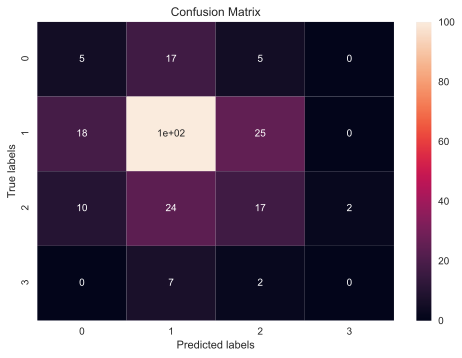

In [268]:
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Модель очень плохо угадывает. Как и предполагалось, с классом 3 проблемы. Более менее с классом 1.

#### Логистическая регрессия

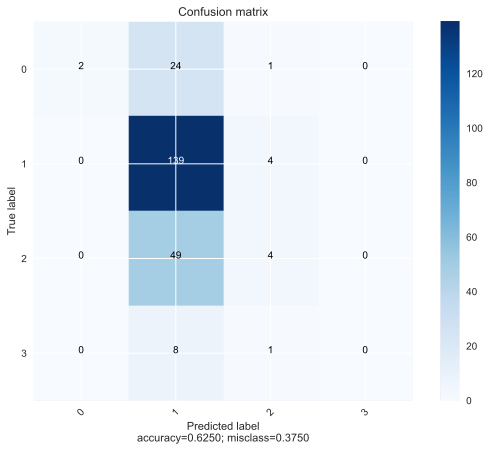

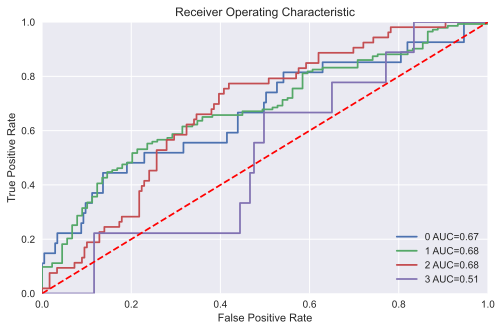

In [234]:
log = LogisticRegression(max_iter=10000, multi_class='ovr', class_weight = {1: 1, 0: 1, 2: 1, 3: 1})
log.fit(x_train, y_train)


preds = log.predict(x_test)

plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, preds),
                      target_names=['0', '1', '2', '3'],
                      normalize=False)

preds_prob = log.predict_proba(x_test)

y_val_bin = label_binarize(y_test, classes=np.arange(4))

plot_roc(y_val_bin, preds_prob, target_names=['0', '1', '2', '3'], figsize=(8,5))

Класс 3 все так же не опознается и AUC всего 0.5, попробуем повысить значимость данного класса.

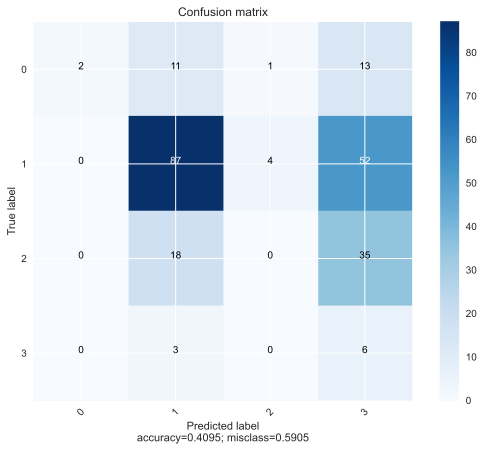

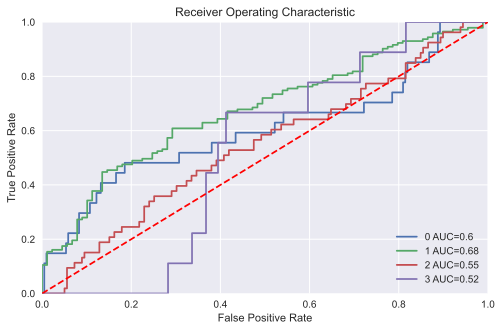

In [240]:
log = LogisticRegression(max_iter=10000, multi_class='ovr', class_weight = {1: 1, 0: 1, 2: 1, 3: 100})
log.fit(x_train, y_train)


preds = log.predict(x_test)

plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, preds),
                      target_names=['0', '1', '2', '3'],
                      normalize=False)

preds_prob = log.predict_proba(x_test)

y_val_bin = label_binarize(y_test, classes=np.arange(4))

plot_roc(y_val_bin, preds_prob, target_names=['0', '1', '2', '3'], figsize=(8,5))

In [241]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.73      0.61      0.66       143
           2       0.00      0.00      0.00        53
           3       0.06      0.67      0.10         9

    accuracy                           0.41       232
   macro avg       0.45      0.34      0.23       232
weighted avg       0.57      0.41      0.43       232



Модель начала опознавать класс 3, с другими классами беда: AUC просел, а количество попаданий уменьшилось.

#### Деревья решений

In [254]:
%%time
dtree = DecisionTreeClassifier(random_state=1337)
params = {'max_depth': np.arange(1,21)}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1337)

dtree_grid = GridSearchCV(dtree, params, cv=rskf, scoring='f1_macro', n_jobs=-1)

dtree_grid.fit(x_train, y_train)

dtree_grid.best_params_

Wall time: 5.16 s


{'max_depth': 8}

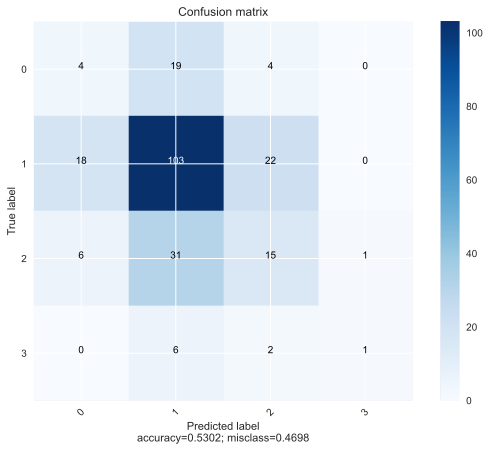

In [255]:
dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(x_train, y_train)
preds = dtree.predict(x_test)

plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, preds),
                      target_names=['0', '1', '2', '3'],
                      normalize=False)

In [256]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.14      0.15      0.15        27
           1       0.65      0.72      0.68       143
           2       0.35      0.28      0.31        53
           3       0.50      0.11      0.18         9

    accuracy                           0.53       232
   macro avg       0.41      0.32      0.33       232
weighted avg       0.52      0.53      0.52       232



Как и предыдущие модели, эта не может угадать классы 0 и 3.

#### Random Forest

In [257]:
X = df.drop(['G3', 'G1', 'passed', 'G4'], axis=1)
Y = df['G4']

In [244]:
%%time
f1_score = []
for i in range(1, 100):
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state = 1337)
    rf = RandomForestClassifier(n_estimators = i, random_state = 1337)
    scores_dtree = cross_val_score(rf, X, Y, cv=rskf, scoring='f1_micro')
    f1_score.append(np.mean(scores_dtree))

Wall time: 2min 8s


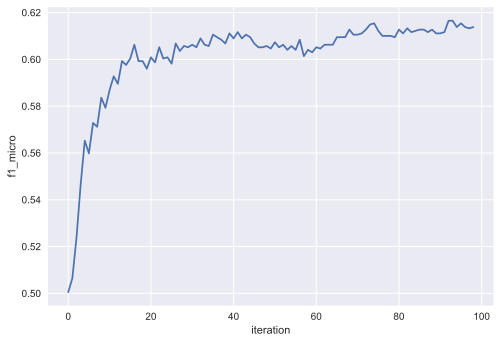

In [245]:
pd.Series(f1_score).plot()

plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.show()

График конечно шалит, но самое большое f1 примерно при 75 деревьях (не на много конечно выше, но попробуем).

Подберем другие параметры.

In [247]:
params = [
    {
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2)
    },
    
    {
        'bootstrap': [False], 
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2) 
    }
]


In [248]:
rf = RandomForestClassifier(n_estimators = 75, random_state=1337)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 1337)

clf = GridSearchCV(rf, params, cv=skf, scoring='f1_micro', n_jobs=5)

In [250]:
%%time
clf.fit(X, Y)

Wall time: 1h 10min 55s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=75,
                                              random_state=1337),
             n_jobs=5,
             param_grid=[{'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11)},
                         {'bootstrap': [False], 'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11)}],
             scoring='f1_micro')

In [251]:
clf.best_params_

{'max_depth': 10,
 'max_features': 18,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

In [260]:
rf = RandomForestClassifier(n_estimators = 75,
                            max_depth = 10,
                            max_features = 18,
                            min_samples_leaf = 2,
                            min_samples_split = 9,
                            random_state=1337)
rf.fit(x_train, y_train)

print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        27
           1       0.66      0.92      0.77       143
           2       0.55      0.32      0.40        53
           3       0.00      0.00      0.00         9

    accuracy                           0.64       232
   macro avg       0.43      0.32      0.31       232
weighted avg       0.59      0.64      0.57       232



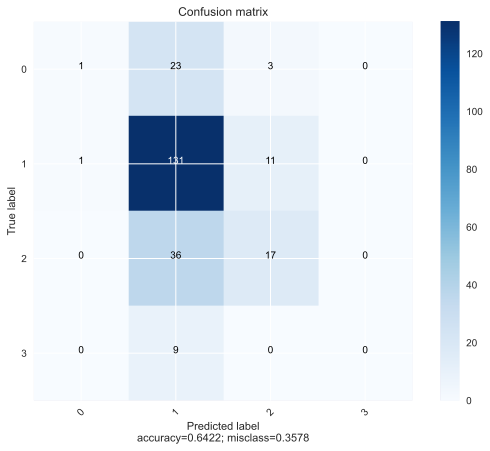

In [259]:
preds = rf.predict(x_test)

plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, preds),
                      target_names=['0', '1', '2', '3'],
                      normalize=False)


Accuracy здесь самое высокое, но угадать классы 0 и 3 так и не удалось. Как всегда, класс 1 лучше всего угадывается (наверное потому что там больше всего народу). Класс не ужасно, но и не хорошо.

#### Gradient Boosting

In [269]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, booster = 'gbtree', random_state = 1337)

Подберем параметр eta и другие

In [271]:
%%time
eta_scores = {'n_trees':[10, 20, 50, 100, 200, 500]}
eta_values = [0.01, 0.05, 0.1, 0.3, 0.5, 1]

for eta in eta_values:
    eta_scores['eta ' + str(eta)] = [np.mean(cross_val_score(xgb.XGBClassifier(n_estimators=n, 
                                                                               learning_rate=eta, 
                                                                               use_label_encoder=False, 
                                                                               n_jobs=6, 
                                                                               verbosity=0),
                                                               X, 
                                                               Y,
                                                               cv=skf, 
                                                               scoring='f1_micro')
                                            ) for n in eta_scores['n_trees']
                                    ]

Wall time: 2min 28s


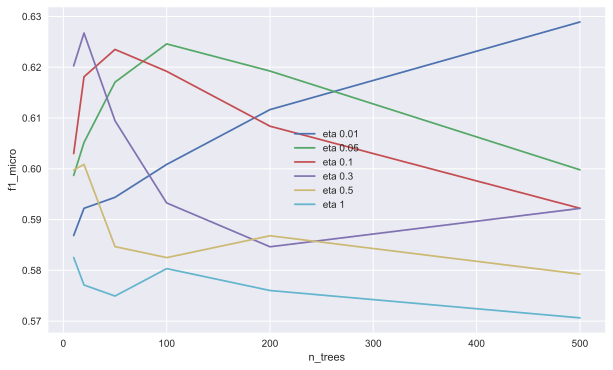

In [273]:
pd.DataFrame(eta_scores).plot(x='n_trees', figsize=(10, 6))
plt.ylabel('f1_micro')
plt.show()

Очень хорошо растет eta = 0.01 и при большом количестве деревьев может дать неплохой результат. При eta = 0.3 график по началу падает но при n_trees = 200 ползет вверх. Остальные показывают результат хуже и при увеличении числа деревьев ухудшаются.
Возьмем eta = 0.01 и n_trees = 400.

In [274]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False,
                              booster = 'gbtree',
                              eta = 0.01,
                              n_estimators = 400,
                              random_state = 1337)

In [275]:
params = [
    {
        'gamma': range(0, 10),
        'max_depth': range(5, 12),
        'min_child_weight': range(1, 12),
    }
]

clf = GridSearchCV(xgb_model, params, cv=skf, scoring='f1_micro', n_jobs=5)

In [276]:
%%time
clf.fit(X, Y)

Wall time: 1h 39min 28s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eta=0.01,
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_wei...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=None,
                                     num_parallel_tree=None, random_state=1337,
                                     reg_alpha=None, reg_lambda=None,
                          

In [277]:
clf.best_params_

{'gamma': 2, 'max_depth': 9, 'min_child_weight': 2}

In [278]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False,
                              booster = 'gbtree',
                              gamma = 2,
                              max_depth = 9,
                              min_child_weight = 2,
                              n_estimators = 400,
                              eta = 0.01,
                              random_state = 1337)



In [280]:
xgb_model.fit(x_train, y_train)
print(metrics.classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.64      0.95      0.76       143
           2       0.42      0.15      0.22        53
           3       0.00      0.00      0.00         9

    accuracy                           0.62       232
   macro avg       0.26      0.28      0.25       232
weighted avg       0.49      0.62      0.52       232



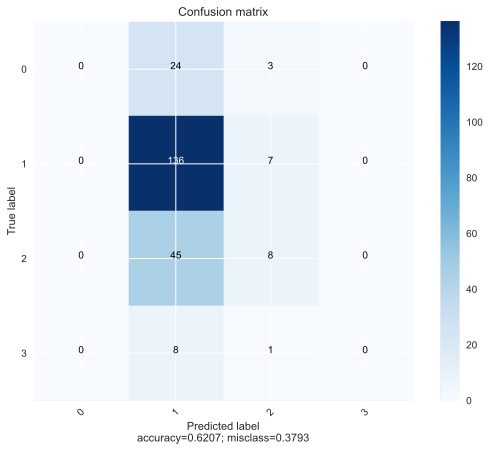

In [281]:
plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, xgb_model.predict(x_test)),
                      target_names=['0', '1', '2', '3'],
                      normalize=False)

Модель начала точнее предсказывать класс 1, а во всех остальных она провалилась. Практически все наблюдения уходят в класс 1.

**Итог:** все модели работают плохо. Я думаю, это связано с тем, что данные несбалансированные (явное преимещуество представителей класса 1)